In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [10]:
data.columns
data = data.drop(['variety'],axis = 1)

cluster0 = [50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]
cluster1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
cluster2 = [52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]


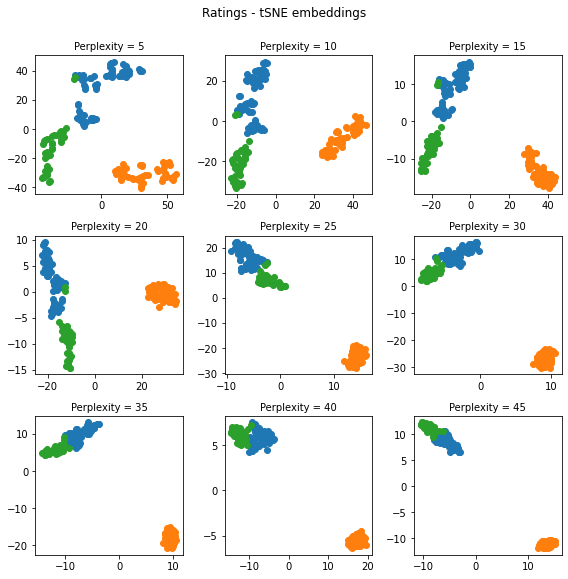

In [11]:
k = 3
#raw_data = ratings
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
annotate = False
perplexities = [5, 10,15,20,25,30,35,40,45]
#data = data.drop('variety')
clusters = []
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
data['label'] = k_means.fit_predict(data)
for c in range(k):
    cluster = data[data['label'] == c]
    print('cluster' + str(c) + ' = ' + str(list(cluster.index)))
    clusters.append(cluster.drop(['label'], axis=1))
clustered_data = pd.concat(clusters)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Ratings - tSNE embeddings', position=(0.5, 1.0))
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(clustered_data.values)
    embedded_clusters = []
    cluster_start = 0
    for cluster in clusters:
        cluster_end = cluster_start + cluster.shape[0]
        embedded_clusters.append(embedding[cluster_start:cluster_end, :])
        cluster_start = cluster_end
    sub = fig.add_subplot(3,3, counter)
    sub.set_title('Perplexity = ' + str(p), fontsize=10)
    for embedded_cluster in embedded_clusters:
        sub.scatter(embedded_cluster[:, 0], embedded_cluster[:, 1])
    if annotate:
        for i, name in enumerate(clustered_data.index):
            sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

Yes, the k-means clustering agrees with the tsnme

cluster0 = [52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]
cluster1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
cluster2 = [50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]


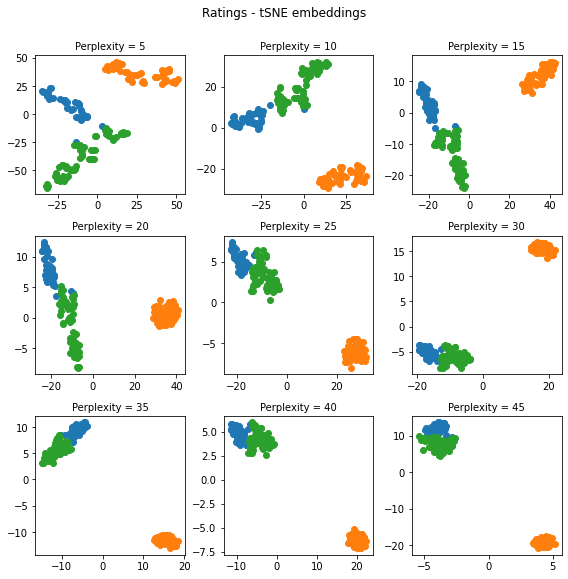

In [12]:
k = 3
#raw_data = ratings
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
annotate = False
perplexities = [5, 10,15,20,25,30,35,40,45]
#data = data.drop('variety')
clusters = []
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
data['label'] = k_means.fit_predict(data)
for c in range(k):
    cluster = data[data['label'] == c]
    print('cluster' + str(c) + ' = ' + str(list(cluster.index)))
    clusters.append(cluster.drop(['label'], axis=1))
clustered_data = pd.concat(clusters)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Ratings - tSNE embeddings', position=(0.5, 1.0))
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(clustered_data.values)
    embedded_clusters = []
    cluster_start = 0
    for cluster in clusters:
        cluster_end = cluster_start + cluster.shape[0]
        embedded_clusters.append(embedding[cluster_start:cluster_end, :])
        cluster_start = cluster_end
    sub = fig.add_subplot(3,3, counter)
    sub.set_title('Perplexity = ' + str(p), fontsize=10)
    for embedded_cluster in embedded_clusters:
        sub.scatter(embedded_cluster[:, 0], embedded_cluster[:, 1])
    if annotate:
        for i, name in enumerate(clustered_data.index):
            sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

The tsnme has put a good job here because it has embedded the clusters in the right place.  